# Day 14 Advanced Techniques in Python Data Visualization

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.datasets import load_iris, load_wine, load_diabetes

In [4]:
data = pd.read_csv('spotify_dataset.csv')
data

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,Jonas Brothers,Sucker,181026,False,2019,79,0.842,0.734,1,-5.065,0,0.0588,0.0427,0.000000,0.1060,0.952,137.958,pop
1996,Taylor Swift,Cruel Summer,178426,False,2019,78,0.552,0.702,9,-5.707,1,0.1570,0.1170,0.000021,0.1050,0.564,169.994,pop
1997,Blanco Brown,The Git Up,200593,False,2019,69,0.847,0.678,9,-8.635,1,0.1090,0.0669,0.000000,0.2740,0.811,97.984,"hip hop, country"
1998,Sam Smith,Dancing With A Stranger (with Normani),171029,False,2019,75,0.741,0.520,8,-7.513,1,0.0656,0.4500,0.000002,0.2220,0.347,102.998,pop


In [5]:
#data.corr() hanya bisa numerik

ValueError: could not convert string to float: 'Britney Spears'

## Heatmap

---
Mengecek korelasi data yang multivariant


In [6]:
numeric_columns = data.select_dtypes(include=['number']).columns
numeric_columns

Index(['duration_ms', 'year', 'popularity', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo'],
      dtype='object')

In [7]:
corr_matrix = data[numeric_columns].corr()
corr_matrix

,duration_ms,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
duration_ms,1.000000,-0.316534,0.050617,-0.060057,-0.078763,-0.002560,-0.079912,-0.003848,0.066998,0.010923,-0.004208,0.024941,-0.116870,-0.028603
year,-0.316534,1.000000,-0.003825,0.033532,-0.108644,0.007380,0.017479,-0.007358,0.001111,0.033809,-0.050265,-0.027037,-0.209365,0.076867
popularity,0.050617,-0.003825,1.000000,-0.003546,-0.014021,0.014823,0.030632,-0.021353,0.021162,0.024619,-0.048059,-0.009856,-0.016142,0.014288
danceability,-0.060057,0.033532,-0.003546,1.000000,-0.104038,0.032731,-0.033315,-0.067528,0.145590,-0.065429,0.023207,-0.126413,0.403178,-0.173418
energy,-0.078763,-0.108644,-0.014021,-0.104038,1.000000,-0.003446,0.651016,-0.040651,-0.057018,-0.445469,0.037861,0.156761,0.334474,0.153719
key,-0.002560,0.007380,0.014823,0.032731,-0.003446,1.000000,-0.007474,-0.153182,0.007147,0.002365,-0.008173,-0.033071,0.036977,-0.001431
loudness,-0.079912,0.017479,0.030632,-0.033315,0.651016,-0.007474,1.000000,-0.028133,-0.076388,-0.310039,-0.104925,0.102159,0.232150,0.080709
mode,-0.003848,-0.007358,-0.021353,-0.067528,-0.040651,-0.153182,-0.028133,1.000000,-0.000077,0.005744,-0.038613,0.025439,-0.074681,0.048434
speechiness,0.066998,0.001111,0.021162,0.145590,-0.057018,0.007147,-0.076388,-0.000077,1.000000,0.000394,-0.062954,0.061172,0.073605,0.057747
acousticness,0.010923,0.033809,0.024619,-0.065429,-0.445469,0.002365,-0.310039,0.005744,0.000394,1.000000,-0.005214,-0.110043,-0.128128,-0.103660


jika nilai positif maka korelasi antara A dgn B adalah eksponensial.
jika negatif kebalikannya


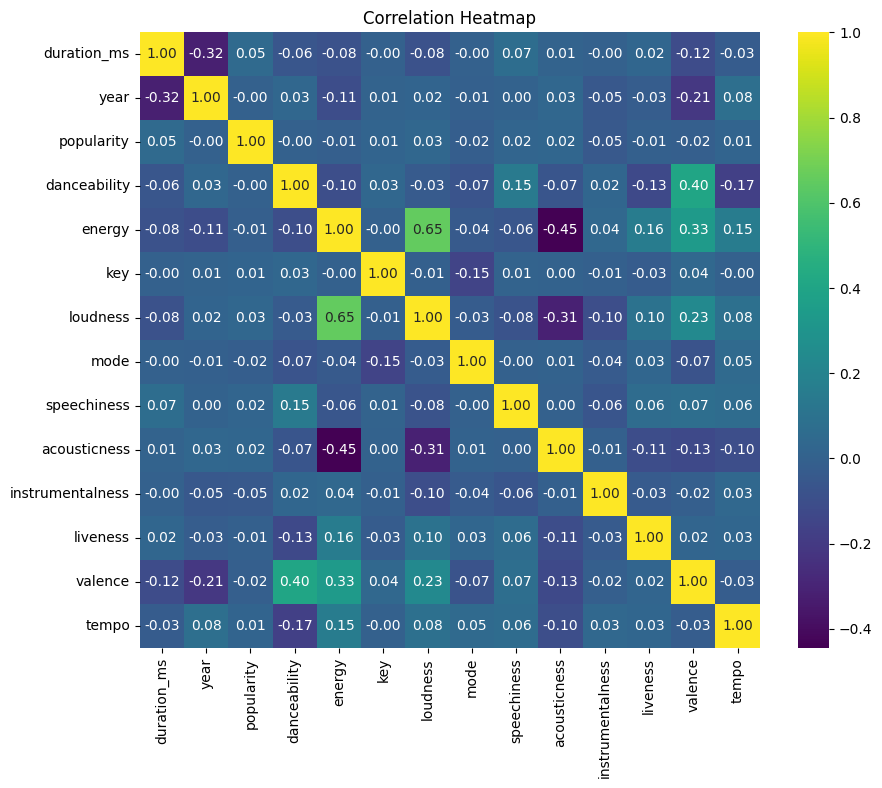

In [10]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='viridis')
plt.title('Correlation Heatmap')
plt.show()

Insight:
1. Variabel year dan duration (ms) berkorelasi negatif cenderung kuat (-0.32), yang artinya semakin tinggi atau besar tahunnya semakin pendek durasinya (ms) dan sebaliknya.
2. Variabel accousticness memiliki korelasi negatif kuat (-0,45) dengan variabel energy, yang artinya semakin accoustic lagunya maka semakin rendah energynya dan sebaliknya.
3. Variabel danceability memiliki korelasi positif kuat (0.40) dengan variabel valence, yang artinya semakin danceable lagunya maka semakin kuat valencenya.
4. variabel loudness dan variabel energy memiliki korelasi positif yang sangat kuat (0.65) , yang artinya semakin loud energy semakin tinggi.

In [11]:
data_year = data[['year', 'song']]
data_year

,year,song
0,2000,Oops!...I Did It Again
1,1999,All The Small Things
2,1999,Breathe
3,2000,It's My Life
4,2000,Bye Bye Bye
...,...,...
1995,2019,Sucker
1996,2019,Cruel Summer
1997,2019,The Git Up
1998,2019,Dancing With A Stranger (with Normani)


In [12]:
# Line chart with fills
data_yearly = data_year.groupby('year').count()
data_yearly

,song
year,
1998,1
1999,38
2000,74
2001,108
2002,90
2003,97
2004,96
2005,104
2006,95


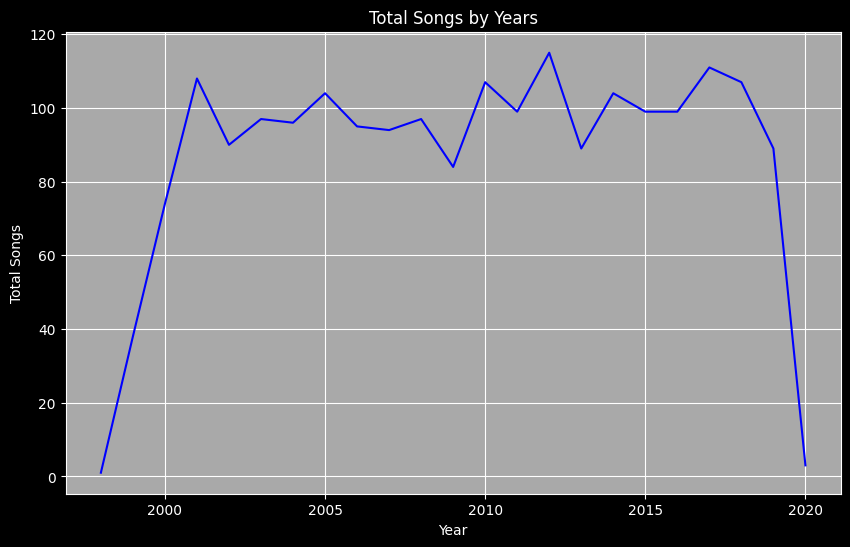

In [22]:
# line chart with fills
plt.figure(figsize=(10, 6))
plt.style.use('dark_background')
sns.lineplot(data=data_yearly, x='year', y='song', color='blue')

#setting background
plt.gca().set_facecolor('darkgrey')
plt.title('Total Songs by Years')
plt.xlabel('Year')
plt.ylabel('Total Songs')
plt.grid(True)
plt.show()

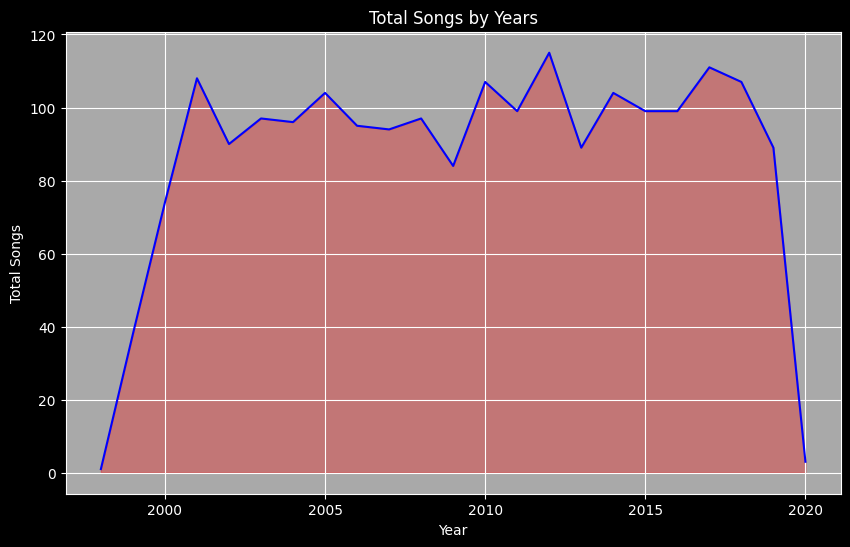

In [20]:
# Menambahkan fills dibawah line chart
# line chart with fills
plt.figure(figsize=(10, 6))
plt.style.use('dark_background')
sns.lineplot(data=data_yearly, x='year', y='song', color='blue')

#setting background
plt.gca().set_facecolor('darkgrey')
plt.fill_between(data_yearly.index, data_yearly['song'], color='red', alpha=0.3)
plt.title('Total Songs by Years')
plt.xlabel('Year')
plt.ylabel('Total Songs')
plt.grid(True)
plt.show()

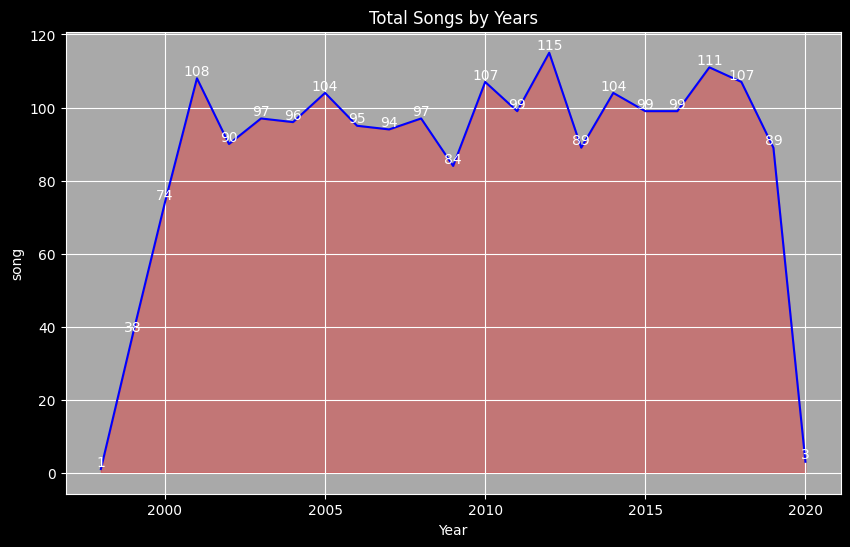

In [27]:
# Menambahkan label pada setiap titik
plt.figure(figsize=(10, 6))
plt.style.use('dark_background')
sns.lineplot(data=data_yearly, x='year', y='song', color='blue')

#setting background
plt.gca().set_facecolor('darkgrey')
plt.fill_between(data_yearly.index, data_yearly['song'], color='red', alpha=0.3)

# menambahkan angka pada setiap titik
for x,y in zip(data_yearly.index, data_yearly['song']):
  plt.text(x, y, str(y), ha='center', va='bottom', color='white')
plt.title('Total Songs by Years')
plt.xlabel('Year')
plt.grid()

## Advanced Bar Chart

<ipython-input-34-ab78fa658597>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(data=data_genre_top10, x='genre', y='song', palette='crest')


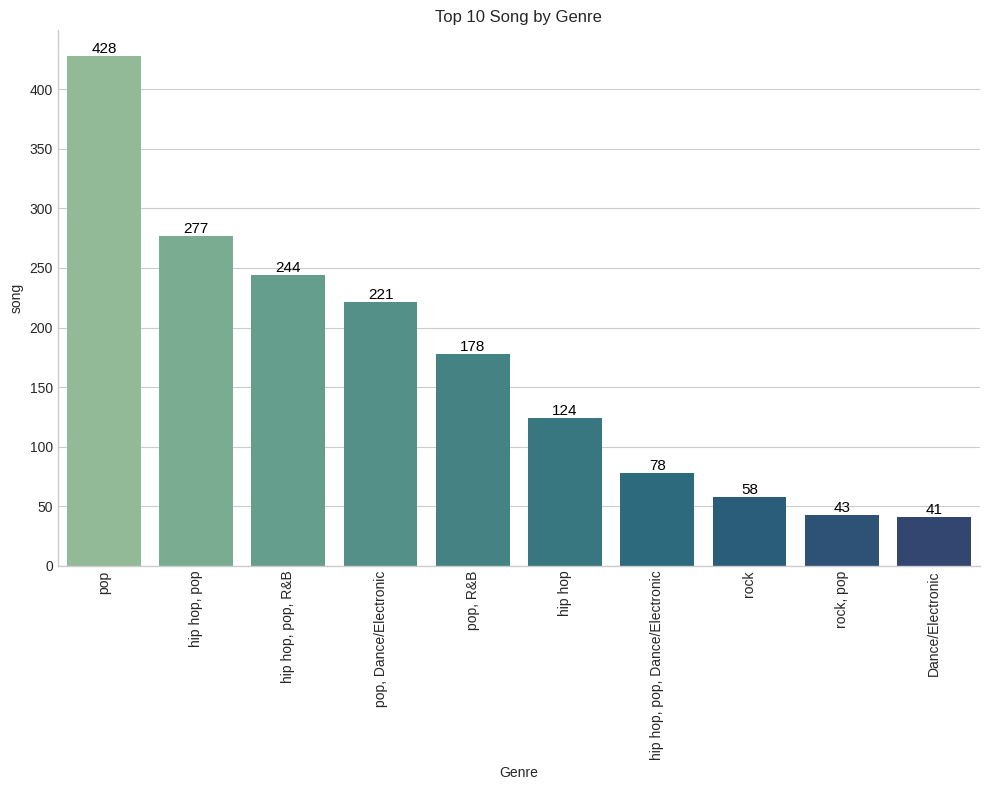

In [34]:
### Advanced Bar Chart
data_genre = data.groupby('genre', as_index=False).count().sort_values(by='song', ascending=False)
data_genre_top10 = data_genre.head(10)
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(10,8))
barplot = sns.barplot(data=data_genre_top10, x='genre', y='song', palette='crest')
## Tambahkan label di setiap bar chart
for index, value in enumerate(data_genre_top10['song']):
  plt.text(index, value, str(value), ha='center', va='bottom', fontsize=11, color='black')
plt.title('Top 10 Song by Genre')
plt.xlabel('Genre')
plt.xticks(rotation=90)

sns.despine()
plt.tight_layout()
plt.show()

In [35]:
data_churn = pd.read_csv('Telco_customer_churn.csv')
data_churn

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,1,United States,California,Landers,92285,"34.341737, -116.539416",34.341737,-116.539416,Female,...,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No,0,45,5306,NaN
7039,6840-RESVB,1,United States,California,Adelanto,92301,"34.667815, -117.536183",34.667815,-117.536183,Male,...,One year,Yes,Mailed check,84.80,1990.5,No,0,59,2140,NaN
7040,2234-XADUH,1,United States,California,Amboy,92304,"34.559882, -115.637164",34.559882,-115.637164,Female,...,One year,Yes,Credit card (automatic),103.20,7362.9,No,0,71,5560,NaN
7041,4801-JZAZL,1,United States,California,Angelus Oaks,92305,"34.1678, -116.86433",34.167800,-116.864330,Female,...,Month-to-month,Yes,Electronic check,29.60,346.45,No,0,59,2793,NaN


In [44]:
# churn reason (bar chart)
churn_reason = data_churn['Churn Reason'].value_counts().sort_values(ascending=False)
churn_reason

,count
Churn Reason,
Attitude of support person,192
Competitor offered higher download speeds,189
Competitor offered more data,162
Don't know,154
Competitor made better offer,140
Attitude of service provider,135
Competitor had better devices,130
Network reliability,103
Product dissatisfaction,102


In [49]:
churn_reason = churn_reason.reset_index()
churn_reason

,Churn Reason,count
0,Attitude of support person,192
1,Competitor offered higher download speeds,189
2,Competitor offered more data,162
3,Don't know,154
4,Competitor made better offer,140
5,Attitude of service provider,135
6,Competitor had better devices,130
7,Network reliability,103
8,Product dissatisfaction,102
9,Price too high,98


<ipython-input-50-648645f54a39>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=churn_reason, x='Churn Reason', y='count', palette='crest')


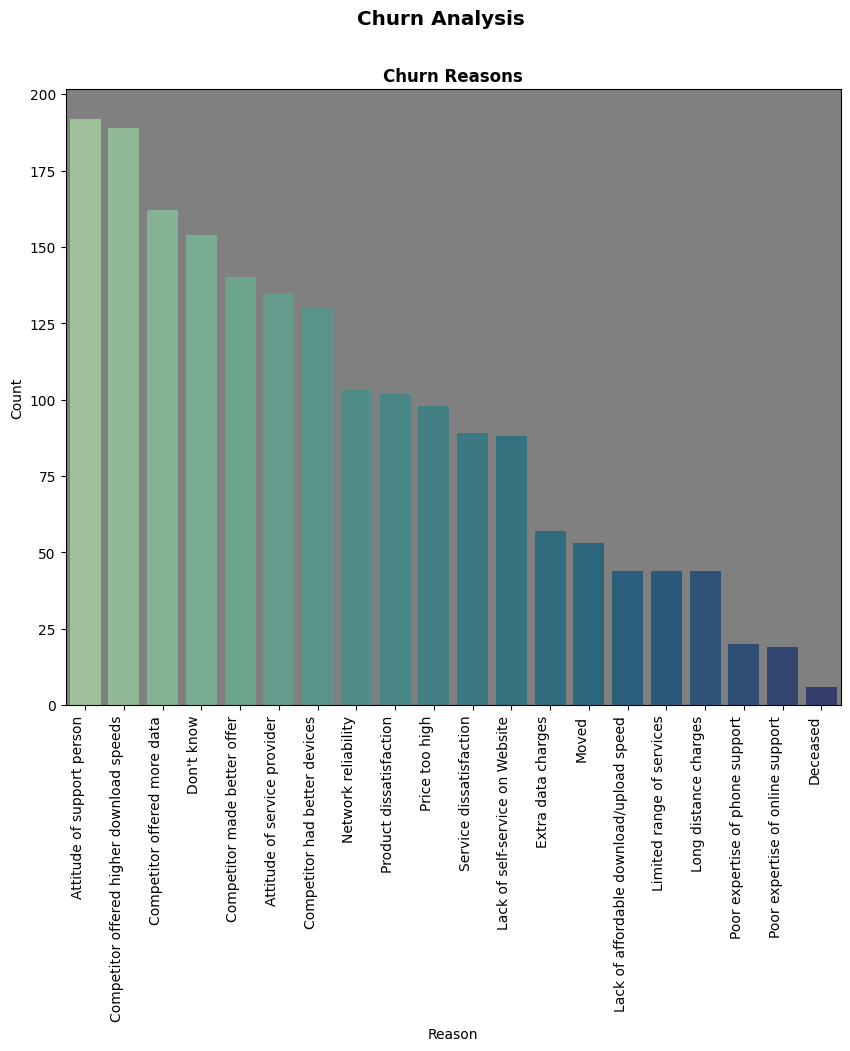

In [50]:
plt.figure(figsize=(10,8))
plt.style.use('default')
sns.barplot(data=churn_reason, x='Churn Reason', y='count', palette='crest')
sns.set_context('notebook')

## Set titles and labels
plt.title('Churn Reasons', fontweight='bold')
plt.suptitle('Churn Analysis', fontweight='bold')
plt.xlabel('Reason')
plt.ylabel('Count')
plt.xticks(rotation=90, horizontalalignment='right')
plt.gca().set_facecolor('grey')

In [53]:
# Multiple bar chart
internet_service = data_churn.groupby(['Internet Service', 'Churn Label']).size().reset_index(name='Jumlah')
internet_service

,Internet Service,Churn Label,Jumlah
0,DSL,No,1962
1,DSL,Yes,459
2,Fiber optic,No,1799
3,Fiber optic,Yes,1297
4,No,No,1413
5,No,Yes,113


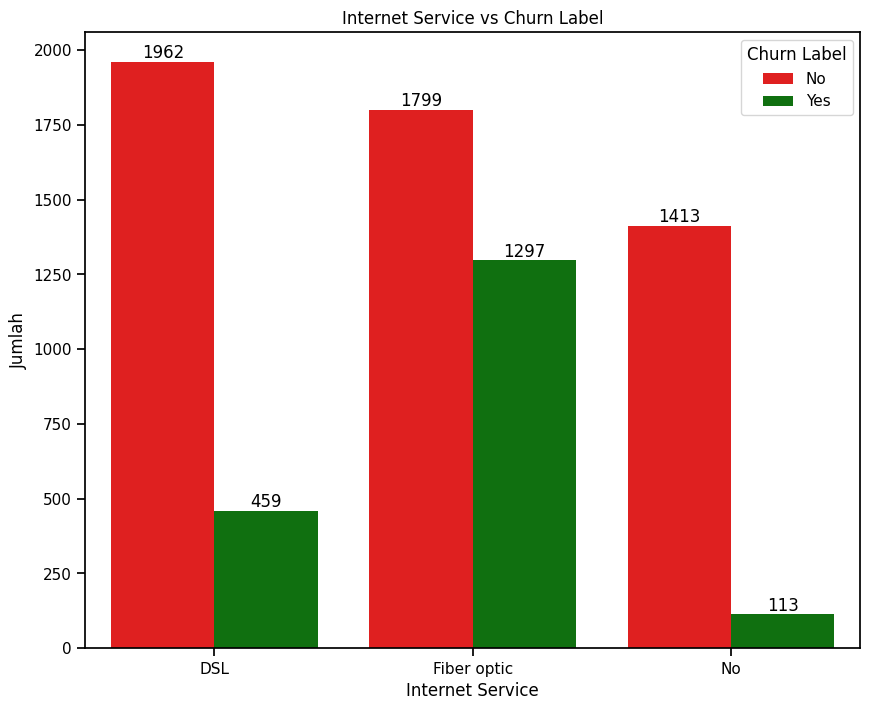

In [56]:
plt.figure(figsize=(10,8))
ax = sns.barplot(data = internet_service, x='Internet Service', y='Jumlah', hue='Churn Label', palette={'No': 'Red', 'Yes': 'Green'})

# Menambahkan label di setiap bar
for s in ax.containers:
  ax.bar_label(s, fmt = '%.0f')

sns.set_context('notebook')
plt.title('Internet Service vs Churn Label')
plt.xlabel('Internet Service')
plt.ylabel('Jumlah')
plt.legend(title='Churn Label')
plt.show()


## Set titles and labels